# In this example we will import NWIS data from the USGS and veiw the data with matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
def import_nwis_Q_data(site_ID,start_date,end_date):
#     url = 'https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=08169000&referred_module=sw&period=&begin_date=2017-02-13&end_date=2018-02-13'
    url = 'https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no={}&referred_module=sw&period=&begin_date={}&end_date={}'.format(site_ID,start_date,end_date)
#     print(url)

    df = pd.read_table(url,skiprows=31,names=['Agency','SiteID','Date','Mean','meanCode','Max','maxCode','Min','minCode'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index(df['Date'])
    df = df[['Date','Mean','Max','Min']]
    return df


In [49]:
df = import_nwis_Q_data('08169000','2017-02-13','2018-02-13')
print(df.dtypes)
df.head()


Date    datetime64[ns]
Mean             int64
Max              int64
Min              int64
dtype: object


,Date,Mean,Max,Min
Date,,,,
2017-02-13,2017-02-13,399,415,384
2017-02-14,2017-02-14,561,759,380
2017-02-15,2017-02-15,457,512,424
2017-02-16,2017-02-16,434,448,420
2017-02-17,2017-02-17,434,448,415


## Now that we have a dataframe with the date, max min and mean discharge, we can plot it!

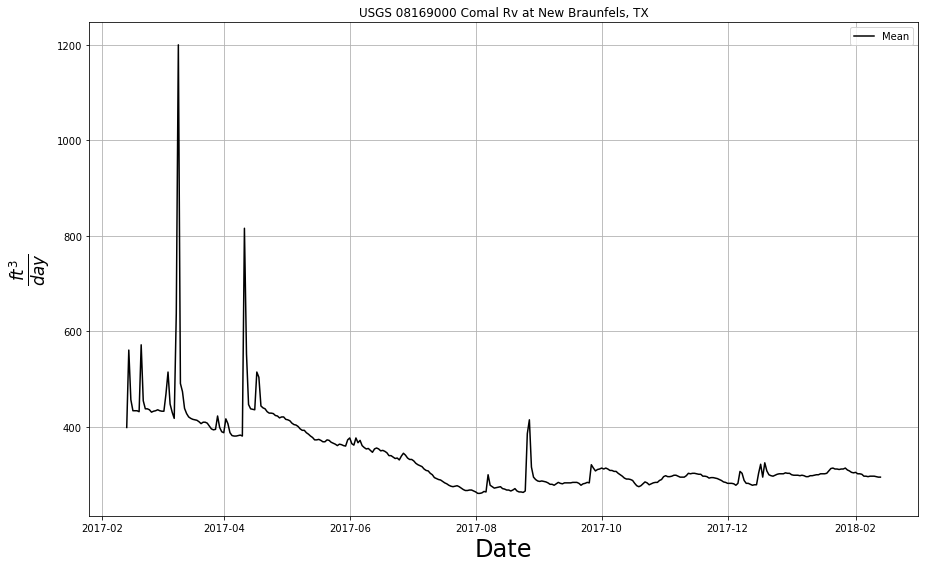

In [69]:
fig, ax = plt.subplots()

ax.plot(df['Date'],df['Mean'],label='Mean',color='k')

# This is to help make it look like a pro plot! 
ax.grid()
ax.legend()
ax.set_ylabel('$\\frac{ft^3}{day}$',fontsize=24)
ax.set_xlabel('Date',fontsize=24)

plt.title('USGS 08169000 Comal Rv at New Braunfels, TX')

fig.set_size_inches(13, 8, forward=True)
fig.tight_layout()

# Lets add the min and max values for the gage and compare!

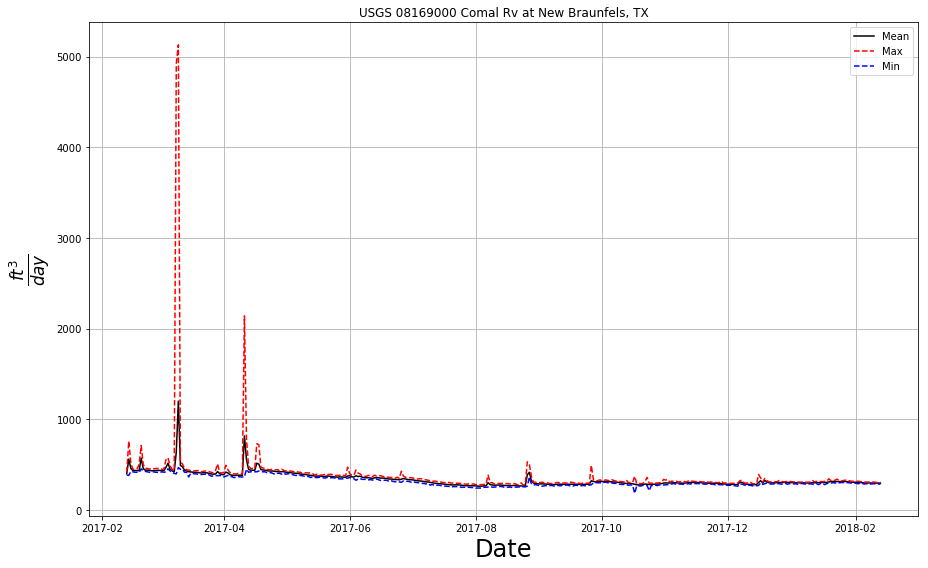

In [68]:
fig, ax = plt.subplots()

ax.plot(df['Date'],df['Mean'],label='Mean',color='k')
ax.plot(df['Date'],df['Max'],label='Max',color='r',ls='--')
ax.plot(df['Date'],df['Min'],label='Min',color='b',ls='--')

# This is to help make it look like a pro plot! 
ax.grid()
ax.legend()
ax.set_ylabel('$\\frac{ft^3}{day}$',fontsize=24)
ax.set_xlabel('Date',fontsize=24)

plt.title('USGS 08169000 Comal Rv at New Braunfels, TX')

fig.set_size_inches(13, 8, forward=True)
fig.tight_layout()

## Notice that the 'Max' data is overpowering the graph, lets make the y axis log and try again

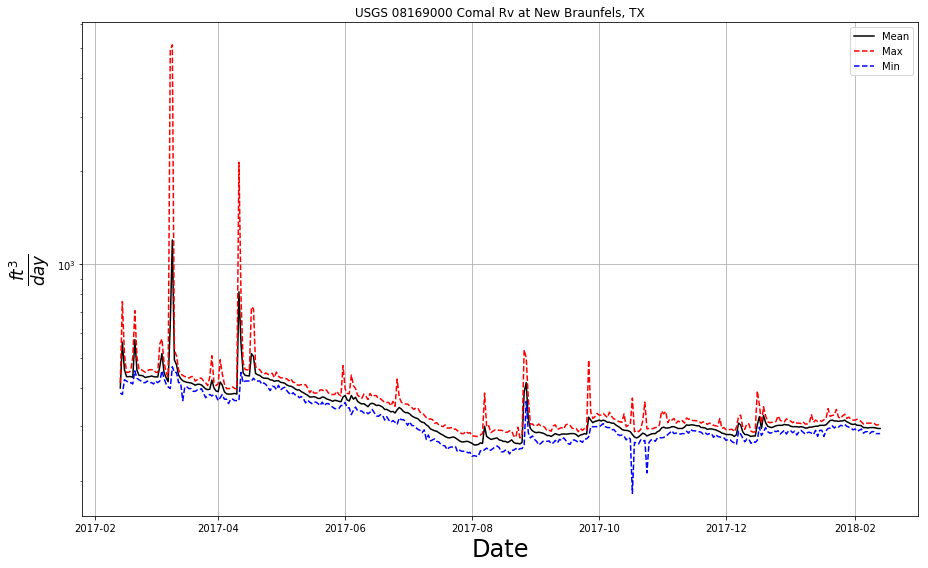

In [70]:
fig, ax = plt.subplots()

ax.plot(df['Date'],df['Mean'],label='Mean',color='k')
ax.plot(df['Date'],df['Max'],label='Max',color='r',ls='--')
ax.plot(df['Date'],df['Min'],label='Min',color='b',ls='--')

# This is to help make it look like a pro plot! 
ax.grid()
ax.legend()
ax.set_ylabel('$\\frac{ft^3}{day}$',fontsize=24)
ax.set_xlabel('Date',fontsize=24)

ax.set_yscale('log') ## <--- here is how we make the x axis log instead of linear

plt.title('USGS 08169000 Comal Rv at New Braunfels, TX')

fig.set_size_inches(13, 8, forward=True)
fig.tight_layout()